<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/examples/test_sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test basic sequence generation functionalities

In [1]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install . 

In [2]:
# from optic.comm.modulation import modulateGray, demodulateGray, grayMapping, detector
from optic.utils import parameters
from optic.models.channels import awgn
from optic.dsp.core import pnorm, anorm, signal_power
from optic.plot import pconst, plotDecisionBoundaries, randomCmap, plotColoredConst
from optic.comm.sources import bitSource, symbolSource, prbsGenerator, cazacSequence
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [3]:
%load_ext autoreload
%autoreload 2

### Test generation of pseudo-random bit sequences with fixed seeds

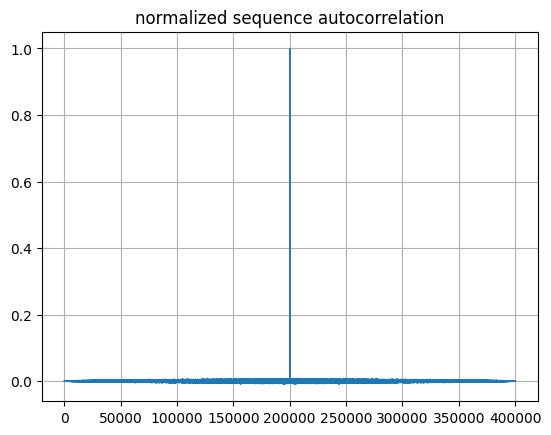

In [4]:
paramBits = parameters()
paramBits.nBits = 200000
paramBits.mode = 'random'
paramBits.seed = 25

bits = bitSource(paramBits)

x = 2*bits-1
u = signal.correlate(x,x)
u = anorm(u)
plt.plot(u,linewidth=1); plt.title('normalized sequence autocorrelation')
plt.grid()

### Test PRBS  generation

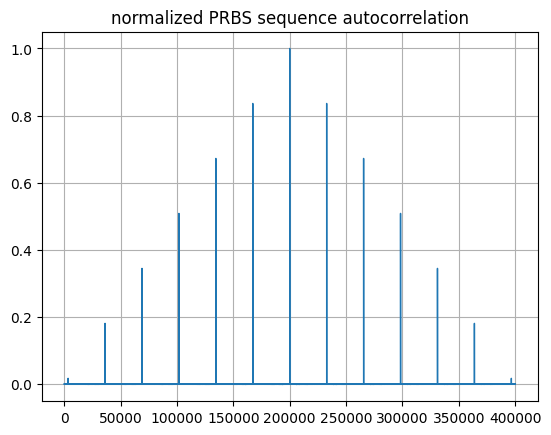

In [5]:
paramBits = parameters()
paramBits.nBits = 200000
paramBits.mode = 'prbs'
paramBits.seed = 25
paramBits.order = 15

bits = bitSource(paramBits)

x = 2*bits-1
u = signal.correlate(x,x)
u = anorm(u)
plt.plot(u,linewidth=1); plt.title('normalized PRBS sequence autocorrelation')
plt.grid()

### Test generation of symbol sequence with probabilistic shaping

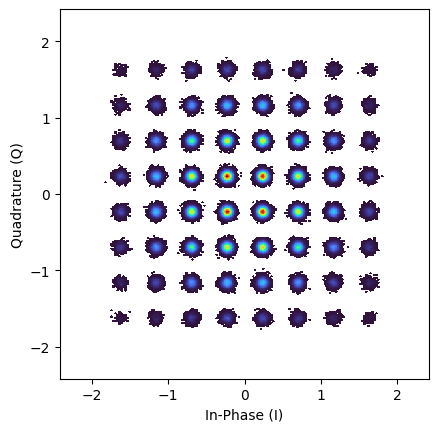

In [6]:
M = 64
N = 200000

paramSymb = parameters()
paramSymb.nSymbols =  N
paramSymb.M = M
paramSymb.constType = 'qam'
paramSymb.dist = 'maxwell-boltzmann'
paramSymb.shapingFactor = 0.05
paramSymb.seed = 10

symbTx = symbolSource(paramSymb)
SNRdB = 25

# AWGN    
EbN0dB = SNRdB - 10*np.log10(np.log2(M))
symbRx = awgn(symbTx, SNRdB)
pconst(symbRx, whiteb=True, R=1.05*np.max(np.abs(symbTx)));

### Test generation of CAZAC sequence


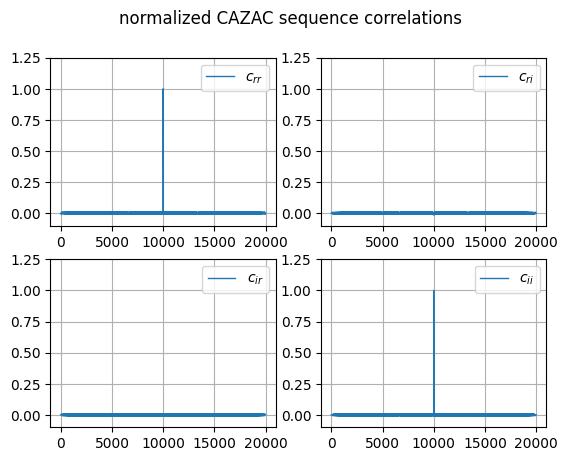

In [7]:
N = 10000
x = cazacSequence(N)

urr = signal.correlate(x.real,x.real)
uri = signal.correlate(x.real,x.imag)
uir = signal.correlate(x.imag,x.real)
uii = signal.correlate(x.imag,x.imag)

scale = np.max([urr, uri, uir, uii])

fig, ax = plt.subplots(2,2)

ax[0,0].plot(urr/scale,linewidth=1, label='$c_{rr}$')
ax[0,0].set_ylim(-0.1,1.25)
ax[0,0].grid()
ax[0,0].legend()
ax[0,1].plot(uri/scale,linewidth=1, label='$c_{ri}$')
ax[0,1].set_ylim(-0.1,1.25)
ax[0,1].grid()
ax[0,1].legend()
ax[1,0].plot(uir/scale,linewidth=1, label='$c_{ir}$')
ax[1,0].set_ylim(-0.1,1.25)
ax[1,0].grid()
ax[1,0].legend()
ax[1,1].plot(uii/scale,linewidth=1, label='$c_{ii}$'); 
ax[1,1].set_ylim(-0.1,1.25)
ax[1,1].grid()
ax[1,1].legend()
fig.suptitle('normalized CAZAC sequence correlations');